In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

Life Expectancy: Project examines changes in life exectancy over the data timeframe and reviews certain contributing factors.


In [4]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life_exp_df = life_expectancy_data.copy()

type(life_exp_df)

pandas.core.frame.DataFrame

In [6]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:

reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']]

reduced_df.columns = [col.strip() for col in reduced_df.columns]

reduced_df

,Country,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36,27.1,7.13,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,4.06,26.7,6.52,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,4.43,26.3,6.53,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,1.72,25.9,6.16,548.587312,12366165.0,0.427,9.8


In [8]:
pd.set_option('display.max_rows', None)
reduced_df['Country'].value_counts()

Finland                                                 16
Algeria                                                 16
Barbados                                                16
Pakistan                                                16
Germany                                                 16
Uzbekistan                                              16
Burkina Faso                                            16
Greece                                                  16
United Republic of Tanzania                             16
Grenada                                                 16
Peru                                                    16
Mauritius                                               16
Croatia                                                 16
Myanmar                                                 16
Egypt                                                   16
Republic of Korea                                       16
Kuwait                                                  

In [9]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
reduced_df['Country'].value_counts()  

C:\Users\mv021\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Finland                                                 16
Barbados                                                16
Germany                                                 16
Uzbekistan                                              16
Burkina Faso                                            16
Seychelles                                              16
Greece                                                  16
United Republic of Tanzania                             16
Grenada                                                 16
Peru                                                    16
Algeria                                                 16
Mauritius                                               16
Myanmar                                                 16
Egypt                                                   16
Republic of Korea                                       16
Kuwait                                                  16
Sudan                                                   

In [10]:
reduced_df.groupby("Country").count() 

,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
Country,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16
Albania,16,16,16,16,16,16,16,16,16,16
Algeria,16,16,16,15,16,15,16,16,16,16
Angola,16,16,16,15,16,15,16,16,16,16
Antigua and Barbuda,16,16,16,15,16,15,16,0,16,16
Argentina,16,16,16,15,16,15,16,16,16,16
Armenia,16,16,16,15,16,15,16,16,16,16
Australia,16,16,16,15,16,15,16,16,16,16
Austria,16,16,16,15,16,15,16,16,16,16


In [11]:
#Create dataframe to focus on life expectancy data
status_df = reduced_df.groupby(['Year', 'Status'], as_index=False)['Life expectancy'].mean()

year_df = pd.DataFrame(status_df)

year_df

,Year,Status,Life expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875
5,2002,Developing,65.190728
6,2003,Developed,77.940625
7,2003,Developing,65.206623
8,2004,Developed,78.384375
9,2004,Developing,65.370861


In [12]:
#Create pivot to plot life expectancy change over the data timeframe
years_df = year_df.pivot_table(index=['Year'], columns=['Status'], values = 'Life expectancy')

years_final_df = pd.DataFrame(years_df)

years_final_df

Status,Developed,Developing
Year,,
2000,76.803125,64.619868
2001,77.128125,65.009934
2002,77.546875,65.190728
2003,77.940625,65.206623
2004,78.384375,65.370861
2005,78.590625,66.009272
2006,79.131250,66.450331
2007,79.300000,66.860927
2008,78.931250,67.413907


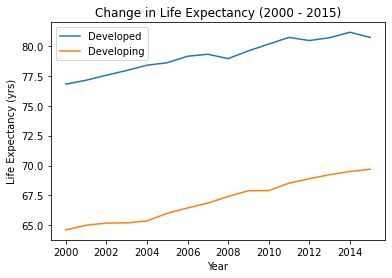

In [13]:
#Create line chart to display life expectancy trend over data years 
plt.plot(years_final_df)
plt.title("Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (yrs)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy Trend.png")

plt.show()

In [14]:
#create dataframe for percent change in life expectancy from year to year
pct_change = years_final_df.pct_change()

pct_change['Developed'] = pct_change['Developed'].fillna(0)
pct_change['Developing'] = pct_change['Developing'].fillna(0)
pct_change['Developed'] = pct_change['Developed'].astype(float) * 100
pct_change['Developing'] = pct_change['Developing'].astype(float) * 100
           
pct_change

Status,Developed,Developing
Year,,
2000,0.000000,0.000000
2001,0.423160,0.603632
2002,0.542928,0.278103
2003,0.507757,0.024381
2004,0.569344,0.251874
2005,0.263126,0.976598
2006,0.687900,0.668178
2007,0.213253,0.617899
2008,-0.465006,0.827060


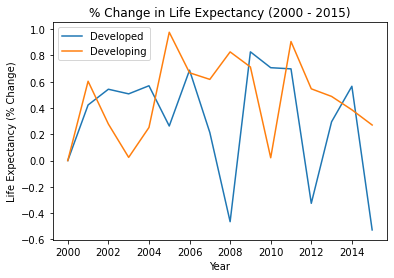

In [15]:
#Create line chart for life expectancy yearly percent change
plt.plot(pct_change)
plt.title("% Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (% Change)")
plt.legend(['Developed', 'Developing'], loc="best")

plt.savefig("Life Expectancy % Change.png")

plt.show()

In [17]:
pct_cumm_change = pct_change

pct_cumm_change['developed_cum_percent'] = round(pct_cumm_change['Developed'].cumsum(),2)
pct_cumm_change['developing_cum_percent'] = round(pct_cumm_change['Developing'].cumsum(),2)

pct_cumm_change = pct_cumm_change.drop(['Developed', 'Developing'],axis=1)

pct_cumm_change

Status,developed_cum_percent,developing_cum_percent
Year,,
2000,0.00,0.00
2001,0.42,0.60
2002,0.97,0.88
2003,1.47,0.91
2004,2.04,1.16
2005,2.31,2.13
2006,2.99,2.80
2007,3.21,3.42
2008,2.74,4.25


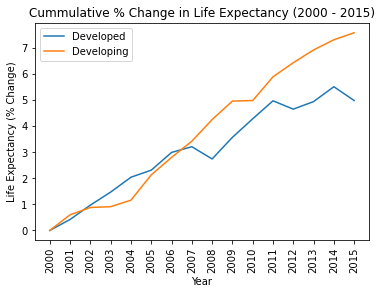

In [18]:
plt.plot(pct_cumm_change)
plt.title("Cummulative % Change in Life Expectancy (2000 - 2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (% Change)")
plt.legend(['Developed', 'Developing'], loc="best")
plt.xticks(list(pct_cumm_change.index), rotation=90)

plt.savefig("Life Expectancy % Cumm Change.png")

plt.show()

Observations: Life Expectancy Trends for Developing and Developed countires (2000 - 2015)

1. As expected, Life Expectancy has increased over the period by roughly 3 years for Developed countries and 5 years for Developing countries. 
2. Although Developed countries have a higher Life Expectancy, Developing countries show a greater increase over the period at 7.8% compared to 5% for Developed countries.
3. There is variation in Life Expectancy with 2008 and 2015 showing decreases in Life Expectancy. Further analysis needs to be done to determine what contributing factors led to the decreases for those 2 years.